In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from control import *
%matplotlib inline

In [2]:
sns.set_color_codes(palette='dark')
sns.set(style="whitegrid")

In [3]:
np.random.seed(0)

In [4]:
def multisine():
    # define the input parameters
    fsample = 1000
    Ts=1/fsample                      # sample frequency and sample period
    Ndata1 = 1000  # need to be 1000       # length of the signal
    t = np.arange(0,Ndata1)*Ts               # time axis
    Nsines = 1000                       # number of sines
    f = np.arange(0,Ndata1)*fsample/Ndata1   # multisine frequencies
    LinesPlot = np.arange(1,np.floor(Ndata1/2)+1)   # lines to be plotted
    
    # multisine 2: with a random phase
    U2 = np.zeros((Ndata1,1), dtype=complex)             # choose random phases
    U2[0:Nsines] = np.exp(1j*2*np.pi*np.random.rand(Nsines,1))
    u2 = 2*((np.fft.ifft(U2)).real)
    u2=u2/(u2.std(axis=0))
    U2m = np.fft.fft(u2)/np.sqrt(Ndata1)       # spectrum of the actual generate multisine

    utra = u2
    
    fig,axes = plt.subplots(figsize=(10,3))

    axes.set_title("Multisine")
    axes.plot(t,utra,color='g')

    #fig.savefig("multiseno.png",dpi=200, bbox_inches='tight')
    
    return [Ndata1, t,utra]

In [5]:
def sweptsine()  :
    # param
    Ts = 1/1e3
    T0 = 1 # period [s]
    f0 = 1/T0 # frequency
    k1 = 1 # [k1*f0,k2*f0] lowest and highest frequency respectively
    k2 = 42 # k2 > k1, natural numbers
    a = np.pi*(k2-k1)*pow(f0,2)
    b = 2*np.pi*k1*f0
    A = 10 # amplitude

    # Ts and T0 need this value to generate tvec = 1000

    t = np.arange(0,T0,Ts)
    #utra = np.array(np.zeros((int(T0/Ts),1)))
    # signal
    utra = A*np.sin((a*t+b)*t).reshape((int(T0/Ts),1))
    
    fig,axes = plt.subplots(figsize=(10,3))

    axes.set_title("Swept Sine")
    axes.plot(t,utra,color='g')

    #fig.savefig("sweptsine.png",dpi=200, bbox_inches='tight')
    
    return [int(T0/Ts), t, utra]

In [6]:
def random_noise():
    Ndata = 1000;
    fsample = 1000;
    Cutoff = 0.1; # cutoff normalized freq
    [b,a] = signal.butter(6,Cutoff*2);
    u = signal.lfilter(b,a,np.random.standard_normal((Ndata,1)));
    
    Um = np.fft.fft(u)/np.sqrt(Ndata);       # spectrum of the actual generate multisine
    LinesPlot = np.arange(1,np.floor(Ndata/2)+1);  # lines to be plotted
    f = np.arange(0,Ndata)*fsample/Ndata;  # frequencies

    t = np.arange(0,Ndata).transpose()/fsample
    
    fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))

    axes[0].set_title("Random Noise - Amplitude (dB)")
    axes[0].plot(f,mag2db(Um),color='g')

    axes[1].set_title("u(t)")
    axes[1].plot(t,u,color='b')

    #fig.savefig("random_noise.png",dpi=200, bbox_inches='tight')
    
    return [Ndata, t,u]

/home/bsilva/.local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1000, 1)
(1000,)


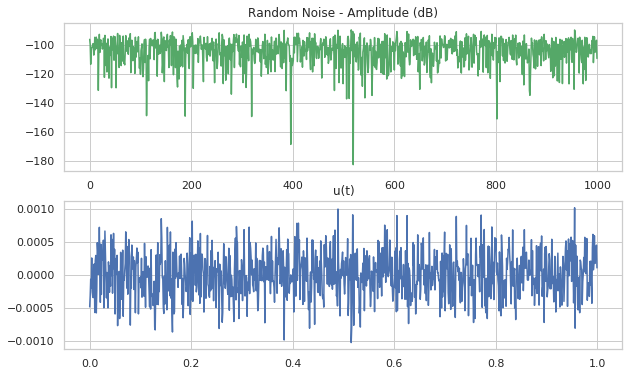

In [63]:
#[N, t, utra] = multisine()
#[N, t,utra] = sweptsine()
[N, t,utra] = random_noise()
print(utra.shape)
print(t.shape)

In [64]:
th = np.array([[0.8006, 0.2330, 0.8071, 0.3879, 0.8635, 0.7471, 0.5562, 0.1365]]).transpose()
print(th)

[[0.8006]
 [0.233 ]
 [0.8071]
 [0.3879]
 [0.8635]
 [0.7471]
 [0.5562]
 [0.1365]]


In [65]:
#N = 1000
#t = np.arange(0,N)
sig = 0.005

In [66]:
u = utra
y = np.array(np.zeros((N,1)))

In [67]:
for k in range(2, N):
    y[k] = -th[0]*y[k-1] - th[1]*y[k-2] - th[2]*y[k-3] - th[3]*y[k-4] \
            + th[4]*u[k-1] + th[5]*u[k-2] + th[6]*u[k-3] + th[7]*u[k-4]

In [68]:
UTRA = u
YTRA = y + sig*np.random.rand(N,1)

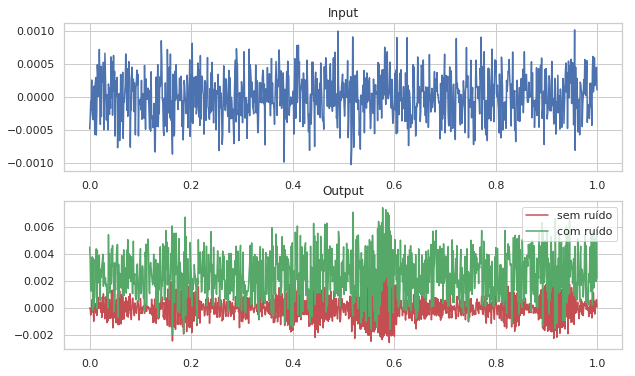

In [69]:
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))

axes[0].set_title("Input")
axes[0].plot(t,UTRA,color='b')

axes[1].set_title("Output")
axes[1].plot(t,y,color='r',label='sem ruído')
axes[1].plot(t,YTRA,color='g',label='com ruído')
axes[1].legend(loc=1)

#fig.savefig("funcoes.png",dpi=200, bbox_inches='tight')

In [70]:
uamp = 10
yr = 1
u = np.array(uamp*np.ones((N,1)))
y = np.array(np.zeros((N,1)))

In [71]:
for k in range(4,N):
    if (y[k-1] >= yr):
        u[k] = -uamp
    elif (y[k-1] <= -yr):
        u[k] = uamp;
    else:
        u[k] = u[k-1]
    y[k] = -th[0]*y[k-1] - th[1]*y[k-2] - th[2]*y[k-3] - th[3]*y[k-4] \
            + th[4]*u[k-1] + th[5]*u[k-2] + th[6]*u[k-3] + th[7]*u[k-4]

In [72]:
UVAL = u
YVAL = y + sig*np.random.rand(N,1)

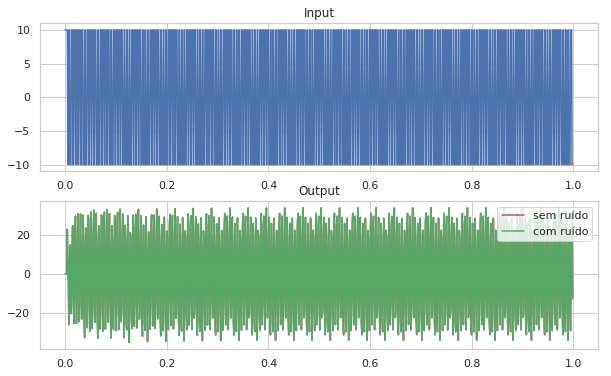

In [73]:
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))

axes[0].set_title("Input")
axes[0].plot(t,UVAL,color='b')

axes[1].set_title("Output")
axes[1].plot(t,y,color='r',label='sem ruído')
axes[1].plot(t,YVAL,color='g',label='com ruído')
axes[1].legend(loc=1)

#fig.savefig("funcoes-2.png",dpi=200, bbox_inches='tight')

In [74]:
print(UTRA[2:-2].shape)

Phi = np.concatenate((-YTRA[3:-1], -YTRA[2:-2], -YTRA[1:-3], -YTRA[0:-4], \
                      UTRA[3:-1] ,UTRA[2:-2], UTRA[1:-3], UTRA[0:-4]), axis=1)
PhiVAL = np.concatenate((-YVAL[3:-1], -YVAL[2:-2], -YVAL[1:-3], -YVAL[0:-4], \
                          UVAL[3:-1] ,UVAL[2:-2], UVAL[1:-3], UVAL[0:-4]), axis=1)
Y1 = YTRA[4:]
Y2 = YVAL[4:]

print(Phi.shape)

(996, 1)
(996, 8)


In [75]:
# Need to pseudo inverse Phi matrix (pinv)
th_hat = np.dot(np.linalg.pinv(np.dot(Phi.conj().transpose(),Phi)), \
                np.dot(Phi.conj().transpose(),Y1))

In [76]:
yhat_TRA_OSA = np.dot(Phi,th_hat)
yhat_VAL_OSA = np.dot(PhiVAL,th_hat)

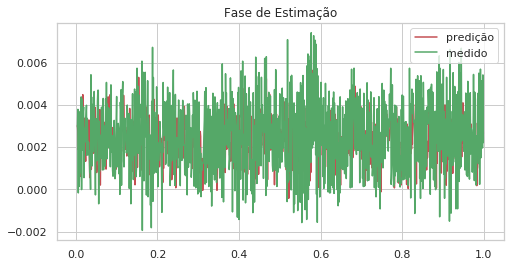

In [77]:
fig,axes = plt.subplots(figsize=(8,4))

axes.set_title("Fase de Estimação")
axes.plot(t[4:],yhat_TRA_OSA,color='r',label='predição')
axes.plot(t[4:],Y1,color='g',label='medido')
axes.legend(loc=1)

#fig.savefig("resultado_training.png",dpi=200, bbox_inches='tight')

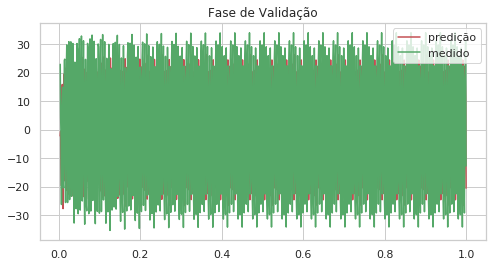

In [78]:
fig,axes = plt.subplots(figsize=(8,4))

axes.set_title("Fase de Validação")
axes.plot(t[4:],yhat_VAL_OSA,color='r',label='predição')
axes.plot(t[4:],Y2,color='g',label='medido')
axes.legend(loc=1)

#fig.savefig("resultado_validate.png",dpi=200, bbox_inches='tight')

In [79]:
def plot_xcorrel(e,u):
    N = len(u)

    conf_factor = 1.96/np.sqrt(N)
    lag_vec = np.arange(0, N)
    
    conf = np.array([np.ones(len(lag_vec))*conf_factor, \
                     -1*np.ones(len(lag_vec))*conf_factor])
    
    EE = np.correlate(e,e, "same")
    UE = np.correlate(u,e, "same")
    EEU = np.correlate(e[0:-1], e[1:]*u[1:], "same")
    
    U2 = np.power(u,2) # element-wise power
    
    U2E = np.correlate(U2 - np.mean(U2),e, "same")
    U2E2 = np.correlate(U2 - np.mean(U2), \
                        np.power(e,2), "same")
    
    fig,axes = plt.subplots(nrows=5, ncols=1, figsize=(10,6))

    axes[0].plot(lag_vec,EE,color='b')
    axes[0].plot(lag_vec,conf[0],color='r',linestyle='--')
    axes[0].plot(lag_vec,conf[1],color='r',linestyle='--')
    axes[0].set_ylabel(r'$\phi_{\xi\xi}(\tau)$')
    axes[0].set_ylim([-1,1])
    axes[0].set_xticklabels([])
    
    axes[1].plot(lag_vec,UE,color='b')
    axes[1].plot(lag_vec,conf[0],color='r',linestyle='--')
    axes[1].plot(lag_vec,conf[1],color='r',linestyle='--')
    axes[1].set_ylabel(r'$\phi_{u\xi}(\tau)$')
    axes[1].set_ylim([-1,1])
    axes[1].set_xticklabels([])

    axes[2].plot(lag_vec[:-1],EEU,color='b')
    axes[2].plot(lag_vec[:-1],conf[0][1:],color='r',linestyle='--')
    axes[2].plot(lag_vec[:-1],conf[1][1:],color='r',linestyle='--')
    axes[2].set_ylabel(r'$\phi_{\xi(\xi u)}(\tau)$')
    axes[2].set_ylim([-1,1])
    axes[2].set_xticklabels([])

    axes[3].plot(lag_vec,U2E,color='b')
    axes[3].plot(lag_vec,conf[0],color='r',linestyle='--')
    axes[3].plot(lag_vec,conf[1],color='r',linestyle='--')
    axes[3].set_ylabel(r'$\phi_{(u^2) \xi}(\tau)$')
    axes[3].set_ylim([-1,1])
    axes[3].set_xticklabels([])
    
    axes[4].plot(lag_vec,U2E2,color='b')
    axes[4].plot(lag_vec,conf[0],color='r',linestyle='--')
    axes[4].plot(lag_vec,conf[1],color='r',linestyle='--')
    axes[4].set_ylabel(r'$\phi_{(u^2) \xi^2}(\tau)$')
    axes[4].set_ylim([-1,1])
    
    #fig.savefig("resultado-corr.png",dpi=500, bbox_inches='tight')

(996,)


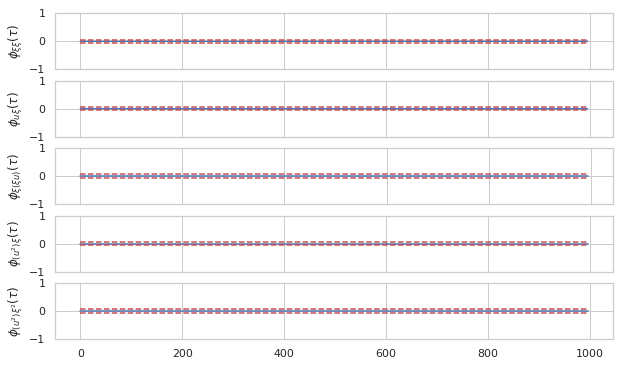

In [80]:
print(UTRA[4:,0].shape)
plot_xcorrel(Y1[:,0]-yhat_TRA_OSA[:,0], UTRA[4:,0])

In [81]:
# free run simulation
yhat_TRA_FR = np.zeros((N,1))
yhat_VAL_FR = np.zeros((N,1))
yhat_TRA_FR[0:4] = YTRA[0:4] # initialize with measurements
yhat_VAL_FR[0:4] = YVAL[0:4] # initialize with measurements

In [82]:
for k in range(4,N):
    yhat_TRA_FR[k] = -th[0]*yhat_TRA_FR[k-1] - th[1]*yhat_TRA_FR[k-2] - th[2]*yhat_TRA_FR[k-3] - th[3]*yhat_TRA_FR[k-4] \
                        + th[4]*UTRA[k-1] + th[5]*UTRA[k-2] + th[6]*UTRA[k-3] + th[7]*UTRA[k-4]
    yhat_VAL_FR[k] = -th[0]*yhat_VAL_FR[k-1] - th[1]*yhat_VAL_FR[k-2] - th[2]*yhat_VAL_FR[k-3] - th[3]*yhat_VAL_FR[k-4] \
                     + th[4]*UVAL[k-1] + th[5]*UVAL[k-2] + th[6]*UVAL[k-3] + th[7]*UVAL[k-4]    

In [83]:
yhat_TRA_FR = yhat_TRA_FR[4:] # remove measurements
yhat_VAL_FR = yhat_VAL_FR[4:] # remove measurements

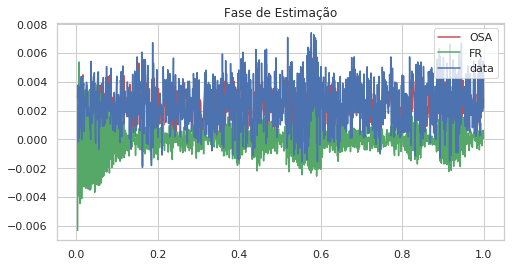

In [84]:
fig,axes = plt.subplots(figsize=(8,4))

axes.set_title("Fase de Estimação")
axes.plot(t[4:],yhat_TRA_OSA,color='r',label='OSA')
axes.plot(t[4:],yhat_TRA_FR,color='g',label='FR')
axes.plot(t[4:],Y1,color='b',label='data')
axes.legend(loc=1)

#fig.savefig("resultado_fr_training.png",dpi=200, bbox_inches='tight')

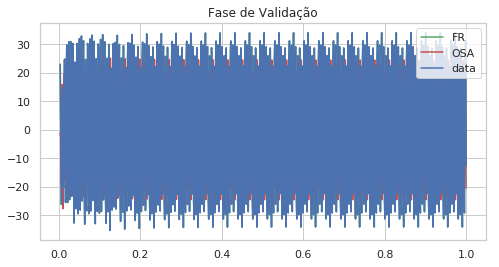

In [85]:
fig,axes = plt.subplots(figsize=(8,4))

axes.set_title("Fase de Validação")
axes.plot(t[4:],yhat_VAL_FR,color='g',label='FR')
axes.plot(t[4:],yhat_VAL_OSA,color='r',label='OSA')
axes.plot(t[4:],Y2,color='b',label='data')
axes.legend(loc=1)

#fig.savefig("resultado_fr_validation.png",dpi=200, bbox_inches='tight')

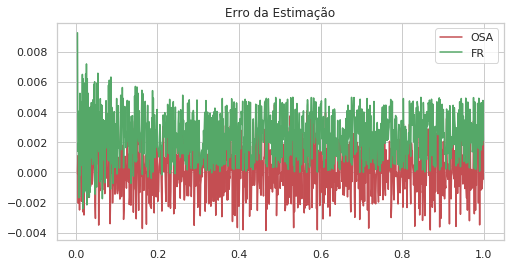

In [86]:
fig,axes = plt.subplots(figsize=(8,4))

axes.set_title("Erro da Estimação")
axes.plot(t[4:],(Y1 - yhat_TRA_OSA),color='r',label='OSA')
axes.plot(t[4:],(Y1 - yhat_TRA_FR),color='g',label='FR')
axes.legend(loc=1)

#fig.savefig("residuals_training.png",dpi=200, bbox_inches='tight')

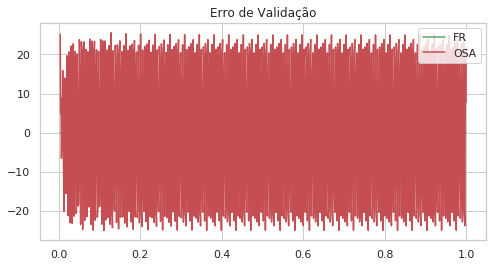

In [87]:
fig,axes = plt.subplots(figsize=(8,4))

axes.set_title("Erro de Validação")
axes.plot(t[4:],(Y2 - yhat_VAL_FR),color='g',label='FR')
axes.plot(t[4:],(Y2 - yhat_VAL_OSA),color='r',label='OSA')
axes.legend(loc=1)

#fig.savefig("residuals_validation.png",dpi=200, bbox_inches='tight')

In [88]:
def mult_corr(real,est):
    # calculate R2 - multiple correlation coefficient
    SSE = np.sum(pow((real - est),2))
    avg_real = np.mean(real)
    sum2 = np.sum(pow((real - avg_real),2))
    return (1 - SSE / sum2)

In [89]:
# calculate metrics
R2_TRA_OSA = mult_corr(Y1,yhat_TRA_OSA);
R2_VAL_OSA = mult_corr(Y2,yhat_VAL_OSA);
R2_TRA_FR  = mult_corr(Y1,yhat_TRA_FR);
R2_VAL_FR  = mult_corr(Y2,yhat_VAL_FR);

print('R2 obtained (1 is perfect) \n')
print('R2_TRA_OSA \t R2_VAL_OSA \t R2_TRA_FR \t R2_VAL_FR\n')
print(  '%0.4f \t\t %0.4f \t %0.4f \t %0.4f\n' % \
        (R2_TRA_OSA,R2_VAL_OSA,R2_TRA_FR,R2_VAL_FR))

R2 obtained (1 is perfect) 

R2_TRA_OSA 	 R2_VAL_OSA 	 R2_TRA_FR 	 R2_VAL_FR

0.0461 		 0.3780 	 -1.9039 	 1.0000



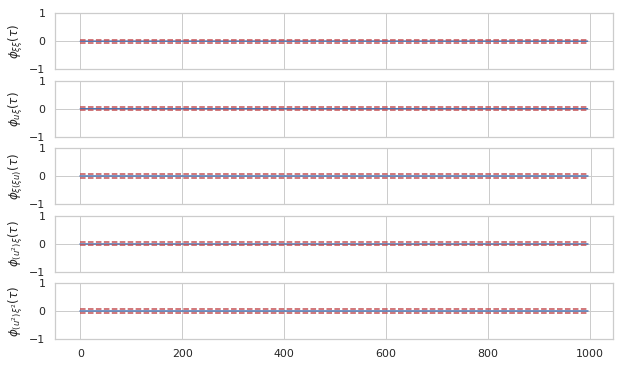

In [90]:
plot_xcorrel(Y1[:,0]-yhat_TRA_FR[:,0], UTRA[4:,0])